**Importing necessary Libraries**

In [72]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


**Creating the dataset**

In [73]:
features, targets = make_classification(n_samples = 36,
                                      n_features = 2,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 123)

In [74]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,0.999362,-1.097203,1
1,0.993493,0.468439,1
2,-0.114038,0.283627,0
3,0.999485,0.045490,1
4,1.002709,1.495644,1


In [75]:
np.bincount(targets)

array([18, 18])

**Visualizing the dataset**

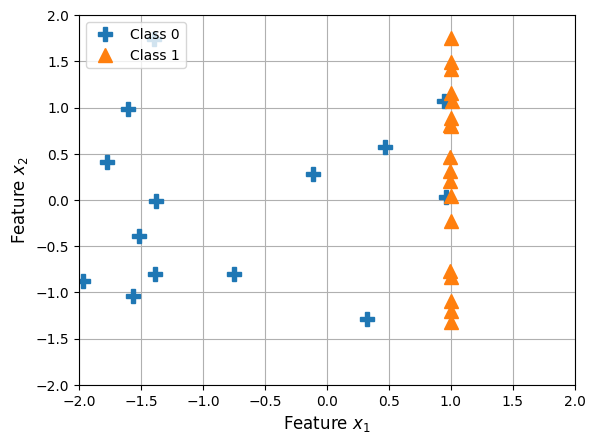

In [76]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = "^",
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

**Implementing a Perceptron**

In [77]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0
        
ppn = Perceptron(num_features= 2)
ppn.weights

[0.0, 0.0]

In [78]:
ppn.bias

0

**Implementing the forward function**

In [79]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0
        
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
            
        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0
            
        return prediction
    
ppn = Perceptron(num_features=2)    # Re-initialize with 2 features
x = [1.233, 2.133]
ppn.forward(x)

0

**Updating the Weights (The Learning Rule)**

In [80]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2)
x = [1.1, 2.1]
ppn.forward(x)

0

In [81]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [0.0, 0.0]
Bias: 0


**Training the model**

In [84]:
def train(model, X_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x in(X_train):
            error = model.forward(x)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [86]:
ppn = Perceptron(num_features = 2)
train(ppn, features,epochs = 5)

Epoch 1 errors 0
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


In [87]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [88]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.5
